In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
netflix = pd.read_csv("Netflix TV Shows and Movies.csv")
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [6]:
netflix.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [35]:
netflix.shape

(5283, 11)

In [8]:
netflix.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [9]:
netflix["age_certification"].unique()

array(['R', 'PG', 'TV-14', 'G', 'PG-13', nan, 'TV-MA', 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

Text(0.5, 1.0, 'Amount of IMDB Votes by Age Certification')

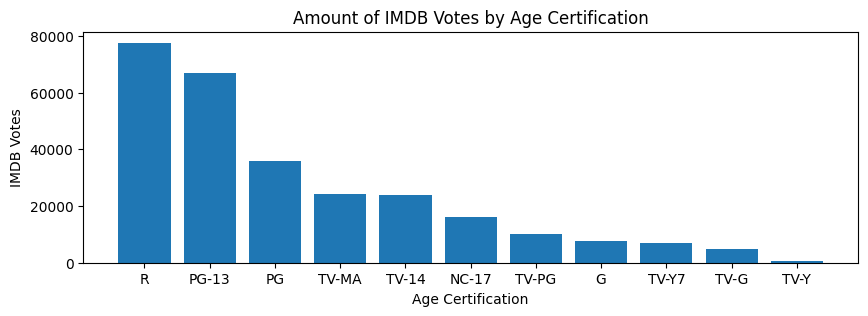

In [31]:
age_category_votes = netflix.groupby("age_certification")[["imdb_votes"]].mean().reset_index().sort_values(by="imdb_votes", ascending=False)
plt.figure(figsize=(10,3))
plt.bar(x="age_certification", height="imdb_votes", data=age_category_votes)
plt.xlabel("Age Certification")
plt.ylabel("IMDB Votes")
plt.title("Amount of IMDB Votes by Age Certification")


Text(0.5, 1.0, 'Average Runtime by Age Certification')

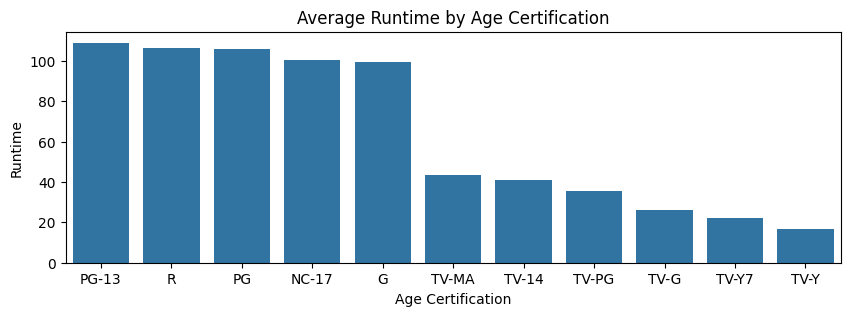

In [43]:
age_category_runtime = netflix.groupby("age_certification")[["runtime"]].mean().reset_index().sort_values(by="runtime", ascending=False)
plt.figure(figsize=(10,3))
sns.barplot(x="age_certification", y="runtime", data=age_category_runtime)
plt.xlabel("Age Certification")
plt.ylabel("Runtime")
plt.title("Average Runtime by Age Certification")

Text(0, 0.5, 'IMDB Scores')

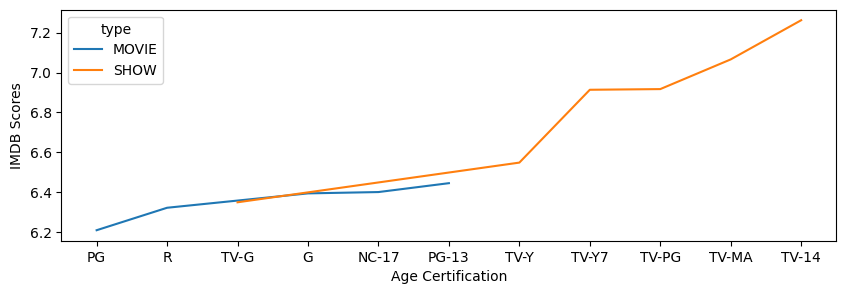

In [55]:
cert_imdb_type = netflix.groupby(["age_certification","type"])[["imdb_score"]].mean().reset_index().sort_values(by="imdb_score")
plt.figure(figsize=(10,3))
sns.lineplot(x="age_certification", y="imdb_score", hue="type", data=cert_imdb_type)
plt.xlabel("Age Certification")
plt.ylabel("IMDB Scores")

Text(0, 0.5, 'IMDB Votes')

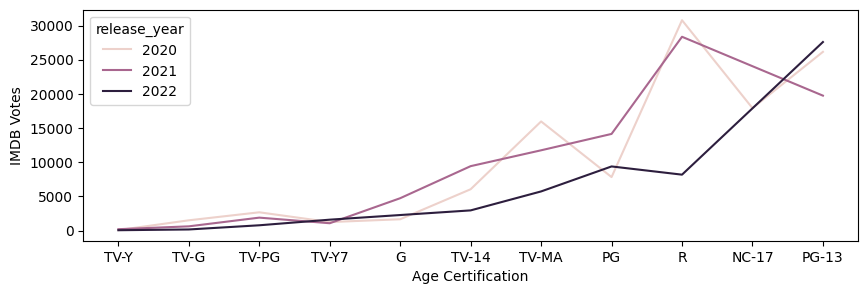

In [71]:
cert_imdb_year = netflix[netflix["release_year"] > 2019].groupby(["age_certification", "release_year"])[["imdb_votes"]].mean().reset_index().sort_values(by="imdb_votes")
plt.figure(figsize=(10, 3))
sns.lineplot(x="age_certification", y="imdb_votes", hue="release_year", data=cert_imdb_year)
plt.xlabel("Age Certification")
plt.ylabel("IMDB Votes")

Text(0, 0.5, 'IMDB Votes')

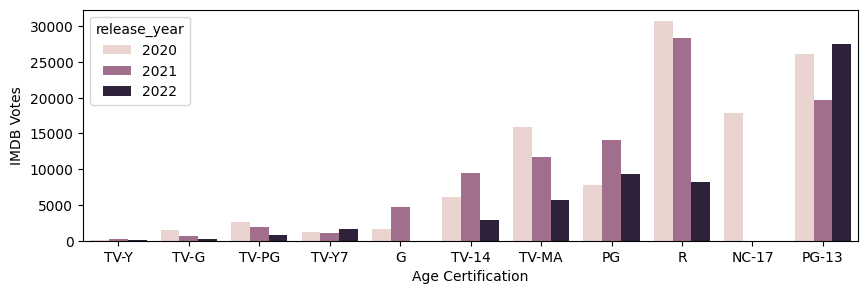

In [72]:
plt.figure(figsize=(10, 3))
sns.barplot(x="age_certification", y="imdb_votes", hue="release_year", data=cert_imdb_year)
plt.xlabel("Age Certification")
plt.ylabel("IMDB Votes")